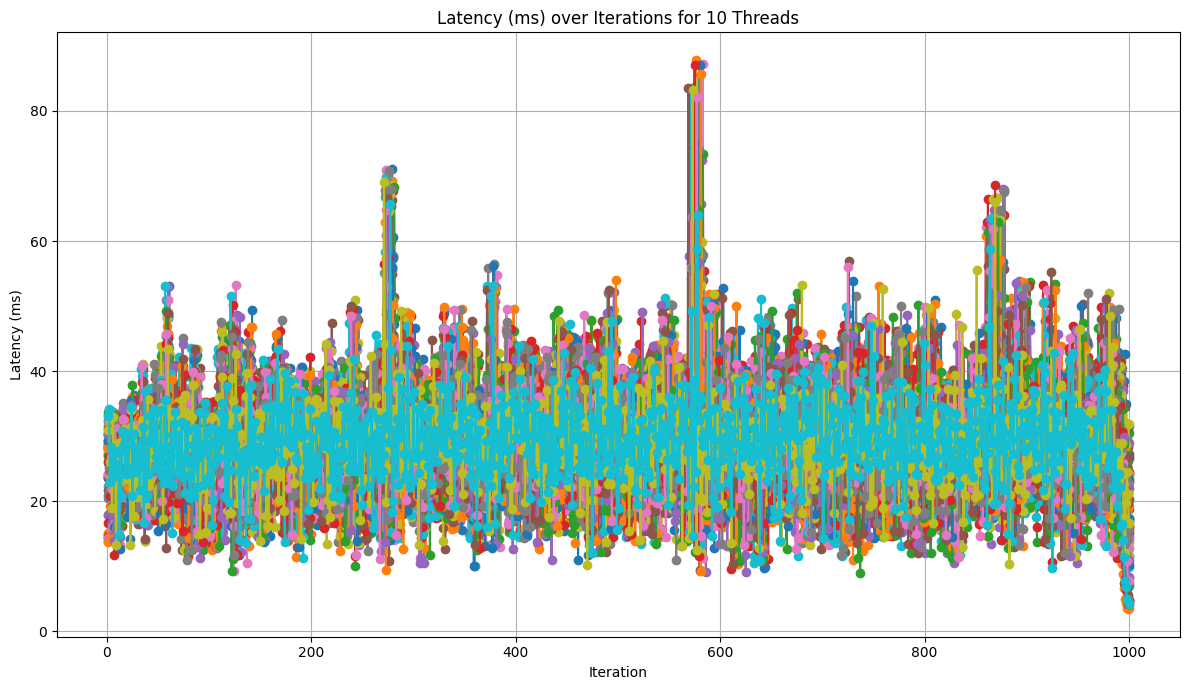

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Loop through 10 thread files
for i in range(1, 51):
    filename = f"result50.thread{i}.csv"
    df = pd.read_csv(filename, sep=';', engine='python')
    df.columns = [col.strip() for col in df.columns]  # Clean column names
    
    plt.plot(df['iteration'], df['latency_ms'], marker='o', linestyle='-', label=f'Thread {i}')

plt.title('Latency (ms) over Iterations for 10 Threads')
plt.xlabel('Iteration')
plt.ylabel('Latency (ms)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


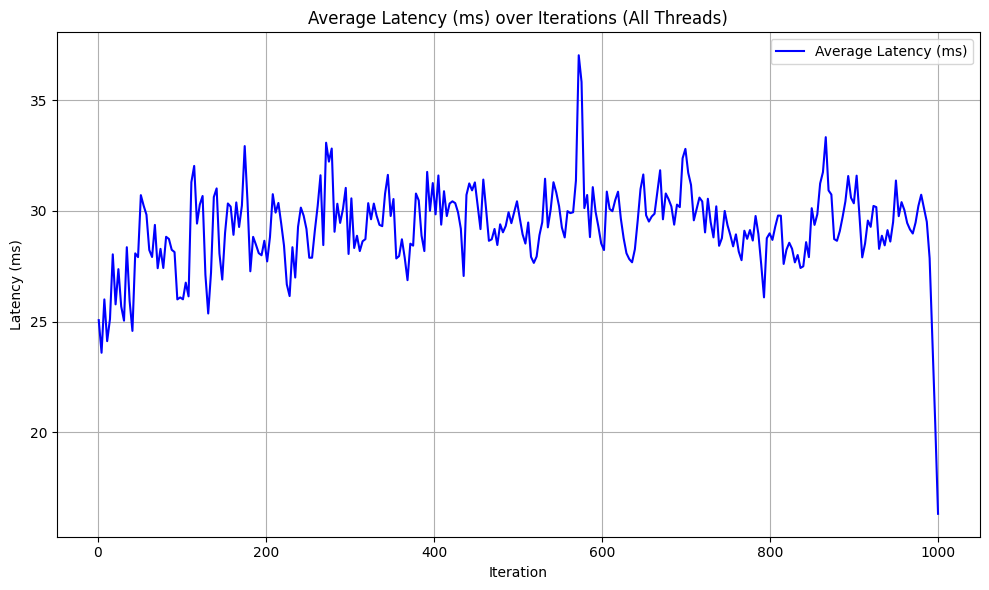

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# List to store dataframes
dfs = []

# Load all threads data
for i in range(1, 51):
    filename = f"result50.thread{i}.csv"
    df = pd.read_csv(filename, sep=';', engine='python')
    df.columns = [col.strip() for col in df.columns]
    dfs.append(df[['iteration', 'latency_ms']])

# Concatenate all data
all_data = pd.concat(dfs)

# Compute average latency_ms for each iteration
avg_latency = all_data.groupby('iteration')['latency_ms'].mean().reset_index()

x = avg_latency['iteration'].values
y = avg_latency['latency_ms'].values

# Smooth curve points
x_smooth = np.linspace(x.min(), x.max(), 300)
spline = make_interp_spline(x, y, k=3)
y_smooth = spline(x_smooth)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, color='blue', label='Average Latency (ms)')
plt.title('Average Latency (ms) over Iterations (All Threads)')
plt.xlabel('Iteration')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
